In [1]:
#General libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Sklearn libraries for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#Sklearn libraries for clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Sklearn linear regression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

Videogames Segmentation

In [2]:
df = pd.read_csv(r"c:\Users\matia\Dropbox\Cosas U\Bimestre 4\Marketing Analytics\Marketing-Analytics-Steam-Project\data\steam.csv")
df.head(5)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [3]:
#Visualize Na values by column
df.isnull().sum()

appid                0
name                 0
release_date         0
english              0
developer            1
publisher           14
platforms            0
required_age         0
categories           0
genres               0
steamspy_tags        0
achievements         0
positive_ratings     0
negative_ratings     0
average_playtime     0
median_playtime      0
owners               0
price                0
dtype: int64

In [4]:
#Visualize the data types of the columns
df.dtypes

appid                 int64
name                 object
release_date         object
english               int64
developer            object
publisher            object
platforms            object
required_age          int64
categories           object
genres               object
steamspy_tags        object
achievements          int64
positive_ratings      int64
negative_ratings      int64
average_playtime      int64
median_playtime       int64
owners               object
price               float64
dtype: object

In [5]:
#Show owners column
df["owners"]

0        10000000-20000000
1         5000000-10000000
2         5000000-10000000
3         5000000-10000000
4         5000000-10000000
               ...        
27070              0-20000
27071              0-20000
27072              0-20000
27073              0-20000
27074              0-20000
Name: owners, Length: 27075, dtype: object

In [6]:
#Split owners values to get the minimum and maximum values
df[['first_value', 'second_value']] = df["owners"].str.split("-", expand=True)

# Make the columns to numeric value
df['first_value'] = pd.to_numeric(df['first_value'])
df['second_value'] = pd.to_numeric(df['second_value'])

#Calculate the average of the owners column
df['owners'] = (df['first_value'] + df['second_value']) / 2

#Drop the first_value and second_value columns
df = df.drop(columns=['first_value', 'second_value'])

df["owners"]

0        15000000.0
1         7500000.0
2         7500000.0
3         7500000.0
4         7500000.0
            ...    
27070       10000.0
27071       10000.0
27072       10000.0
27073       10000.0
27074       10000.0
Name: owners, Length: 27075, dtype: float64

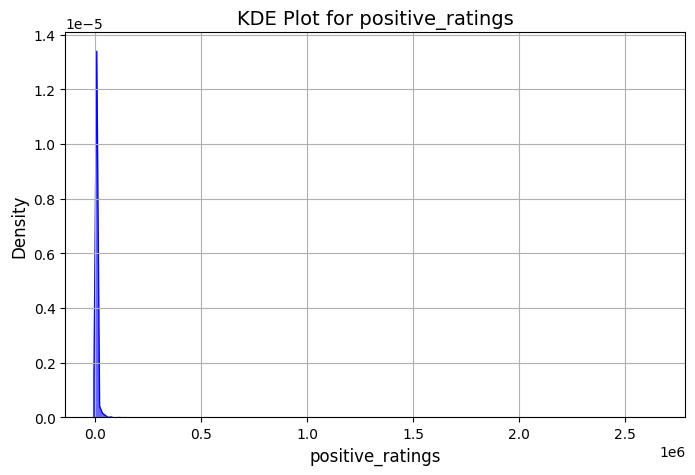

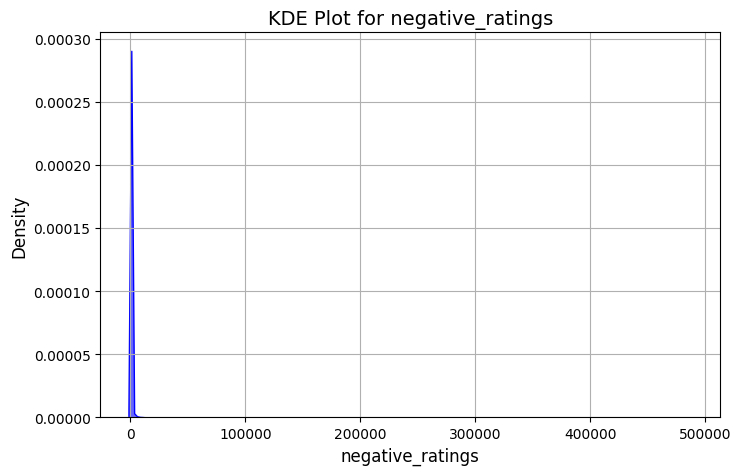

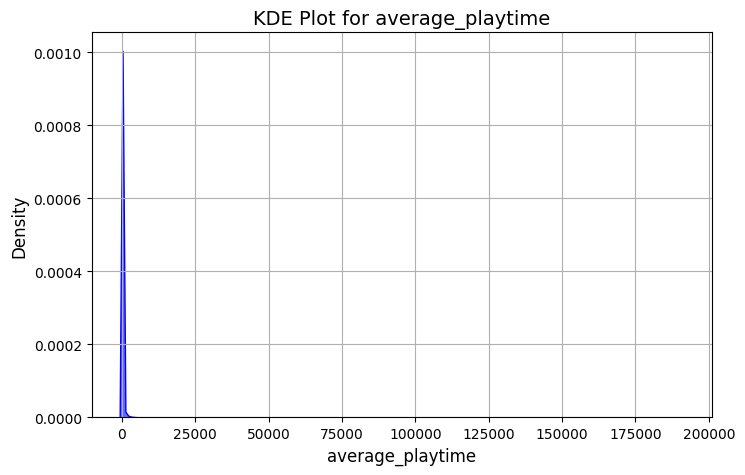

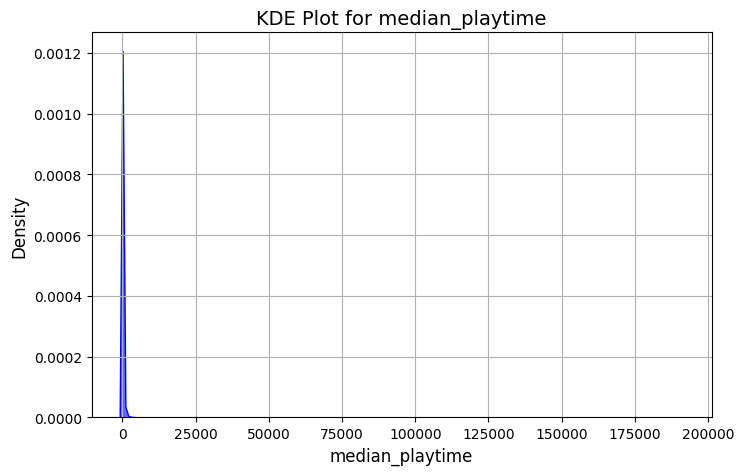

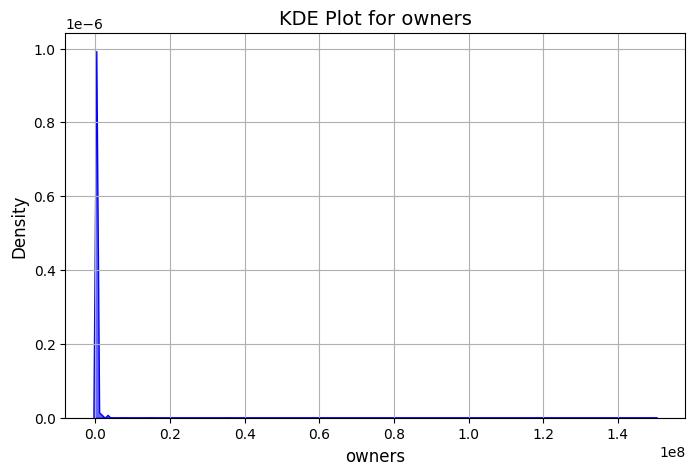

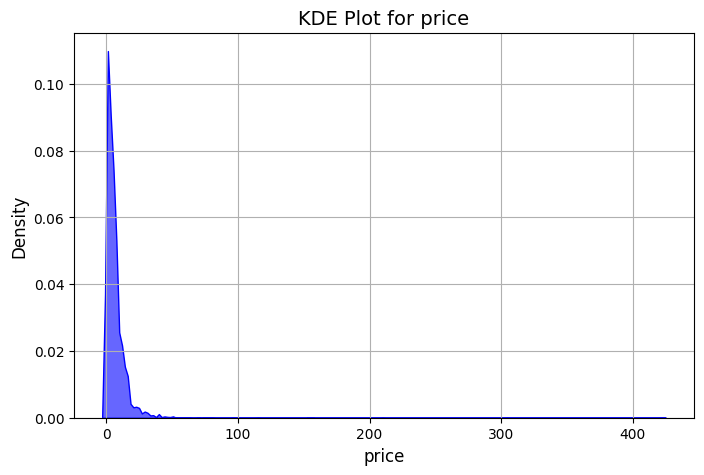

In [7]:
#Show the distribution of the numerical columns with a kde plot

# Identify numerical columns
numerical_columns = df[['positive_ratings','negative_ratings' , 'average_playtime', 'median_playtime', 'owners', 'price']]

# Plot KDE for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=df, x=column, fill=True, alpha=0.6, color='blue')
    plt.title(f'KDE Plot for {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.grid(True)
    plt.show()

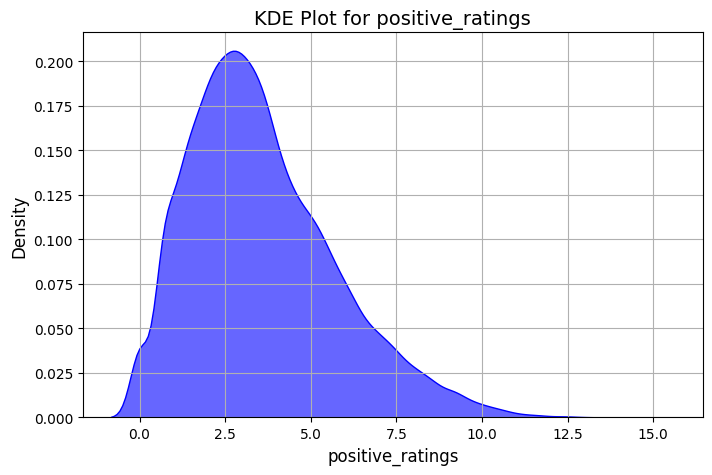

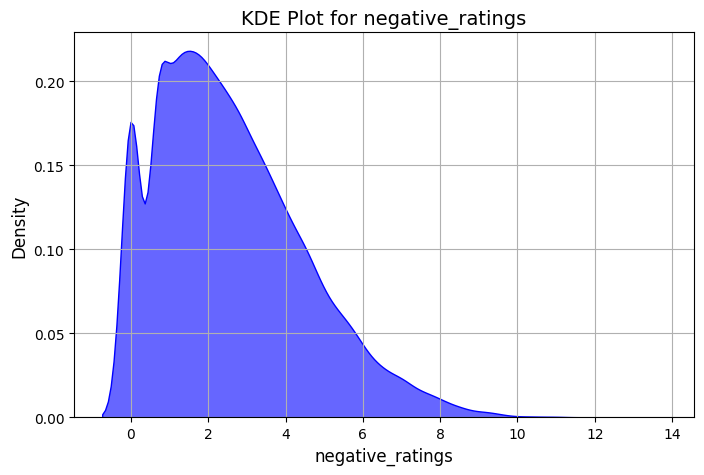

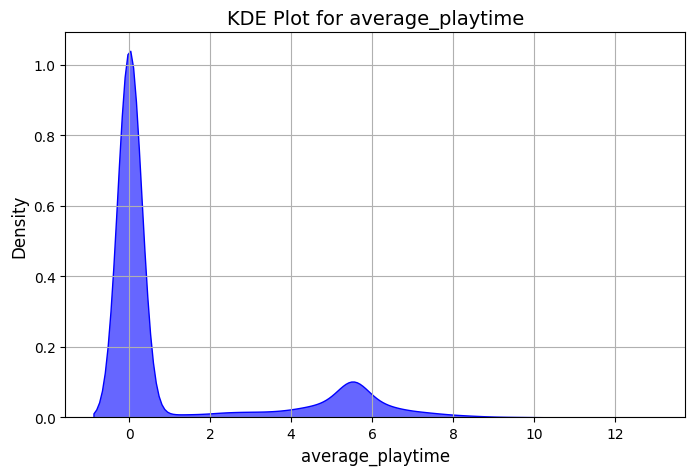

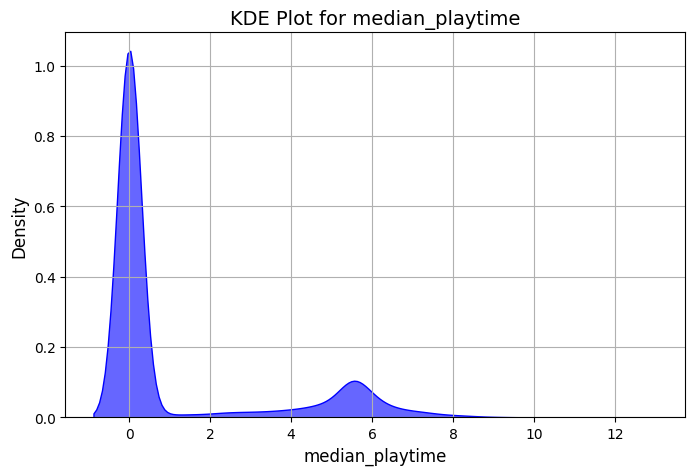

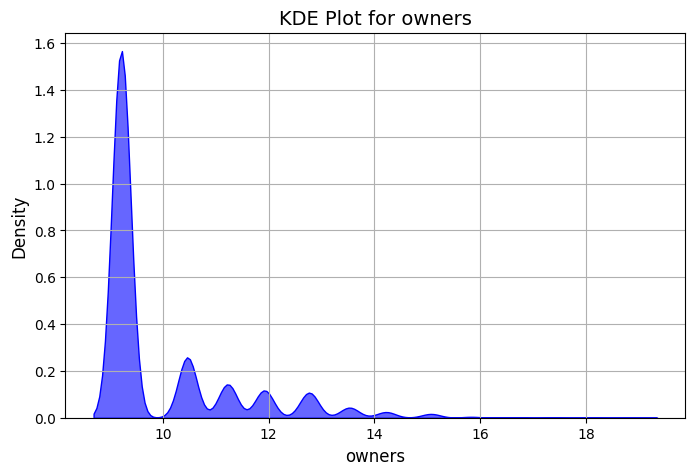

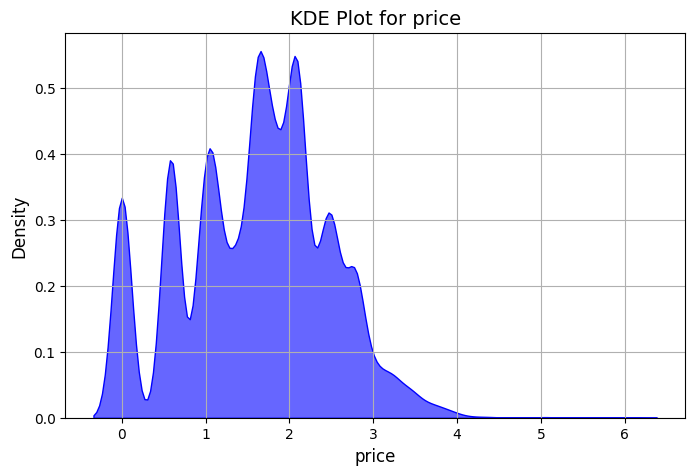

In [8]:
#apply log transformation to the numerical columns
df[['positive_ratings','negative_ratings' , 'average_playtime', 'median_playtime', 'owners', 'price']] = np.log1p(df[['positive_ratings','negative_ratings' , 'average_playtime', 'median_playtime', 'owners', 'price']])
# Plot KDE for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=df, x=column, fill=True, alpha=0.6, color='blue')
    plt.title(f'KDE Plot for {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.grid(True)
    plt.show()

In [9]:
#Make a linear regresion to understand the relationship between the postitve ranking and the numerical features

# Definir las variables dependiente e independientes
X = df[['average_playtime', 'median_playtime', 'owners', 'price']]  # Variables independientes
y = df['positive_ratings']  # Variable dependiente

# Añadir una constante para el intercepto (equivalente a la columna de unos en R)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X)  # OLS = Ordinary Least Squares
results = model.fit()

# Mostrar el resumen del modelo
print(results.summary())

#Average playtime and owners most significant variables

                            OLS Regression Results                            
Dep. Variable:       positive_ratings   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                 1.341e+04
Date:                Fri, 20 Dec 2024   Prob (F-statistic):               0.00
Time:                        04:45:32   Log-Likelihood:                -44217.
No. Observations:               27075   AIC:                         8.844e+04
Df Residuals:                   27070   BIC:                         8.849e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -8.3141      0.083  

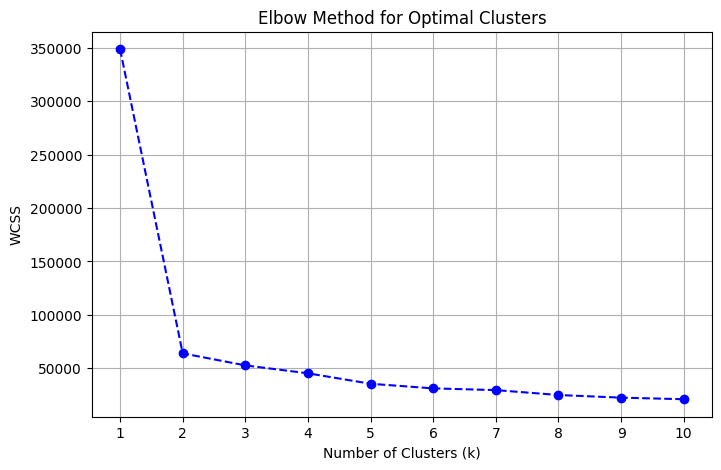

In [10]:
#Elbow method to find the optimal number of clusters
# Select the features for clustering (e.g., numerical columns)
features = df[['average_playtime', 'median_playtime', 'owners', 'price']]

# Initialize variables
wcss = []

# Test different numbers of clusters
for k in range(1, 11):  # Test cluster counts from 1 to 10
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

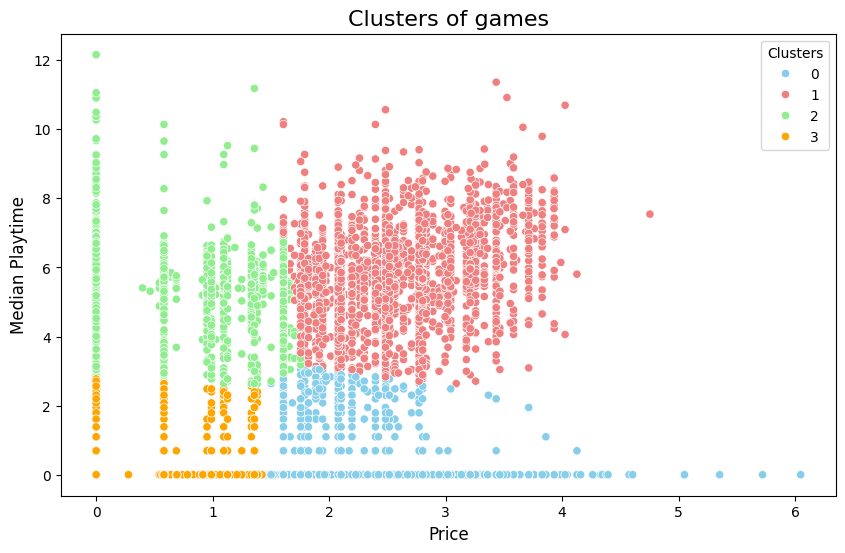

In [11]:
#Create a kmeans model to cluster the data with average playtime and owners
X = df[["price", "median_playtime"]]

#Standardize the data
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

#Create the kmeans model
kmeans = KMeans(n_clusters=4, random_state=42)

#Fit the model
kmeans.fit(X_scaled)

#Predict the clusters
clusters = kmeans.predict(X_scaled)

#Add the clusters to the dataframe
df["clusters"] = clusters

#Visualize the clusters

plt.figure(figsize=(10, 6))
#Custom color palette
custom_palette = {0: "skyblue", 1: "lightcoral", 2: "lightgreen", 3:"orange"}   # Adjust colors as desired

sns.scatterplot(
    data=df,
    x="price",
    y="median_playtime",
    hue="clusters",
    palette=custom_palette
)

plt.title("Clusters of games", fontsize=16)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Median Playtime", fontsize=12)
plt.legend(title="Clusters", loc="upper right", fontsize=10)
plt.show()

In [12]:
df["clusters"].value_counts()

clusters
0    12682
3     8937
1     3000
2     2456
Name: count, dtype: int64

In [13]:
#Change the clusters to another name
df["clusters"] = df["clusters"].replace({0: "High price, low playtime", 1: "High price, high playtime", 2: "Low price, high playtime", 3: "Low price, low playtime"})
df["clusters"].value_counts()

clusters
High price, low playtime     12682
Low price, low playtime       8937
High price, high playtime     3000
Low price, high playtime      2456
Name: count, dtype: int64

In [15]:
#Calcular los clusters en porcentaje del total 
cluster_percentage = df["clusters"].value_counts(normalize=True) * 100
cluster_percentage

clusters
High price, low playtime     46.840259
Low price, low playtime      33.008310
High price, high playtime    11.080332
Low price, high playtime      9.071099
Name: proportion, dtype: float64

En relacion a la segmentación que realizamos de los diferentes juegos, pudimos separarlos en 4 diferentes segmentos:

En primer lugar tenemos al segmento más grande que consta de los juegos que tiene un precio elevado, pero bajo tiempo de juego 
que podemos  inferir sobre este segmento, principalmente dos cosas, o son juegos muy caros que no funcionaron del todo, puediendo
tomar mejoras al respecto, ya que al ser caros podemos pensar que son juegos AAA, con un gran tiempo de desarrollo, e inversion
que buscan ser un exito en el mercado, pero al tener tan poco tiempo de juego podemos decir que no se logro el valor esperado.

Por otro lado tenemos los juegos con un alto precio, pero tambien con un alto tiempo de juego, podríamos decir que son el segundo mejor
segmento que uno puede esperar, ya que, fueron juegos con una alta inversion, y que a lo mejor lograron retener a los usuarios.

En tercer lugar tenemos los juegos con un bajo precio, pero con un alto tiempo de juego, estos son el mejor segmento al que uno puede aspirar
debido a que por su bajo precio puede acceder a una gran base de usuarios, además de retenerlo por un largo periodo de tiempo, en muchos casos
podemos encontrar los juegos gratis pero con microtransacciones, que permite al largo plazo obtener mayores ganancias, pese a ser juegos gratuitos

Por ultimo tenemos los juegos con un bajo precio, pero con un bajo tiempo de juego, que son juegos a lo mejor no tan interesantes en su mayoria
debido a que por su bajo tiempo, deben ser juegos indies, o en otros casos juegos con poco potencial, que no aspiran a la rejugabilidad o a la retencion
de los usuarios.